Examples of the 'agegap' hazard
===============================

In this notebook you can find a few examples of how the `agegap` hazard can be used
to influence the age differences in formed relationships.


In [1]:
# First, we'll load some modules that we're going to need
%matplotlib inline
import pysimpactcyan
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
# Create an instance of the PySimpactCyan class, which we can then use to run simulations
simpact = pysimpactcyan.PySimpactCyan()

Setting data directory to /usr/local/share/simpact-cyan/


In [3]:
# This is a helper function that runs a simulation, analyzes the generated data
# and creates a plot from it: a point in the figure indicates a relationship,
# the X-axis is the age of the man when the relationship was formed and the Y-axis
# is the relationship of the woman. A line is also fitted to these formed
# relationships and is shown as a red line. The green line is just the diagonal:
# if everyone formed relationships only with people of the same age, all points
# would lie on this green line.

def showAges(cfg, path="/tmp/simptest", seed=-1):
    ret = simpact.run(cfg, path, seed=seed)
    rel = pd.read_csv(ret["logrelations"])
    ppl = pd.read_csv(ret["logpersons"])
    numRel = rel.shape[0]

    agesMen = []
    agesWomen = []
    for r in range(numRel):
        idm = rel.iloc[r]["ID1"]
        idw = rel.iloc[r]["ID2"]
        t = rel.iloc[r]["FormTime"]
        tobm = float(ppl[ppl["ID"] == idm]["TOB"])
        tobw = float(ppl[ppl["ID"] == idw]["TOB"])
        agesMen.append(t-tobm)
        agesWomen.append(t-tobw)

    plt.figure(1, figsize=(6,6), dpi=80)
    plt.gca().set_aspect('equal')
    plt.xlabel("Age man")
    plt.ylabel("Age woman")
    plt.plot(agesMen, agesWomen, 'o')
    plt.plot([0,100],[0,100]) # Plot the diagonal
    
    # Also perform a linear fit and plot the line
    slope, intercept, r_value, p_value, std_err = stats.linregress(agesMen, agesWomen)
    x = np.array([0,100])
    y = x*slope + intercept
    plt.plot(x,y)
    
    print("")
    print("Slope = {}, Intercept = {}".format(slope, intercept))


Using identifier 'simpact-cyan-2016-08-11-08-35-58_29810_3KQSiDvW-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 601645757
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0testing4
# Current simulation time is 15.0182
# Number of events executed is 2728
# Started with 200 people, ending with 178 (difference is -22)

Slope = 0.0282533212881, Intercept = 37.3282735326


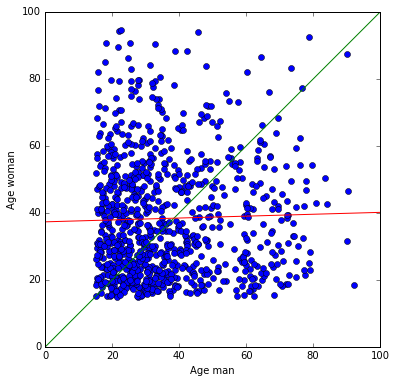

In [4]:
# First, we'll run a simulation with all the default settings. This uses
# the 'simple' formation hazard with settings that do not specify any 
# particular age difference.
showAges(None);

Using identifier 'simpact-cyan-2016-08-11-08-36-00_29810_IzYLaBZX-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 1050213560
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0testing4
# Current simulation time is 50.0106
# Number of events executed is 3758
# Started with 400 people, ending with 99 (difference is -301)

Slope = 0.992624838233, Intercept = 0.28814744341


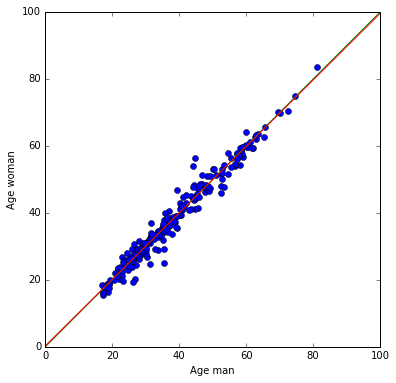

In [5]:
# Next, we're going to run a simulation with the 'agegap' hazard. By default
# the preferred age gap is 0, and by controlling 'formation.hazard.agegap.gap_factor_man'
# and 'formation.hazard.agegap.gap_factor_woman' we can control the width of the
# resulting distribution. Using the settings below, only relationships in which
# both partners have approximately the same age will be formed.

cfg = {}
cfg["population.simtime"] = 50
cfg["population.nummen"] = 200
cfg["population.numwomen"] = 200
cfg["formation.hazard.type"] = "agegap"
cfg["formation.hazard.agegap.baseline"] = 0
cfg["formation.hazard.agegap.gap_factor_man"] = -0.3
cfg["formation.hazard.agegap.gap_factor_woman"] = -0.3
showAges(cfg);

Using identifier 'simpact-cyan-2016-08-11-08-36-01_29810_WK0s5ujy-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 282817613
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0testing4
# Current simulation time is 50.0549
# Number of events executed is 4421
# Started with 400 people, ending with 116 (difference is -284)

Slope = 0.86925979125, Intercept = 5.53536687244


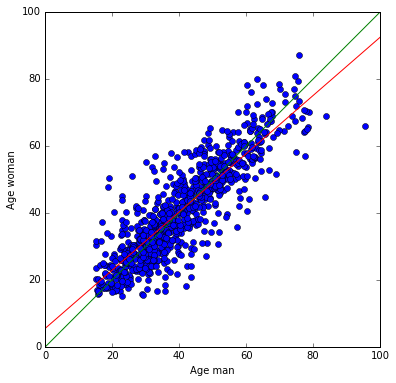

In [6]:
# This is nearly the same simulation as the previous one, but here the
# weight of the agegap term is different, resulting in a broader
# distribution.

cfg = {}
cfg["population.simtime"] = 50
cfg["population.nummen"] = 200
cfg["population.numwomen"] = 200
cfg["formation.hazard.type"] = "agegap"
cfg["formation.hazard.agegap.baseline"] = 0
cfg["formation.hazard.agegap.gap_factor_man"] = -0.075
cfg["formation.hazard.agegap.gap_factor_woman"] = -0.075
showAges(cfg);

Using identifier 'simpact-cyan-2016-08-11-08-36-02_29810_97ntZGkK-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 1530596245
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0testing4
# Current simulation time is 50.1198
# Number of events executed is 3686
# Started with 400 people, ending with 116 (difference is -284)

Slope = 0.98595335, Intercept = -14.1697061417


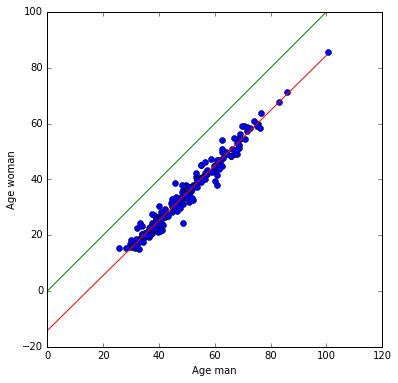

In [7]:
# In the following simulation, we'll use the settings for the narrower
# distribution again, but we'll also specify a preferred age gap of 15
# years, both for men and for women. This will cause the distribution to
# be offset from the diagonal

cfg = {}
cfg["population.simtime"] = 50
cfg["population.nummen"] = 200
cfg["population.numwomen"] = 200
cfg["formation.hazard.type"] = "agegap"
cfg["formation.hazard.agegap.baseline"] = 0
cfg["formation.hazard.agegap.gap_factor_man"] = -0.3
cfg["formation.hazard.agegap.gap_factor_woman"] = -0.3
cfg["person.agegap.man.dist.fixed.value"] = 15
cfg["person.agegap.woman.dist.fixed.value"] = 15
showAges(cfg);

Using identifier 'simpact-cyan-2016-08-11-08-36-03_29810_yd0FuY3h-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 167908706
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0testing4
# Current simulation time is 50.0311
# Number of events executed is 3466
# Started with 400 people, ending with 106 (difference is -294)

Slope = 0.708014510196, Intercept = 1.3549835085


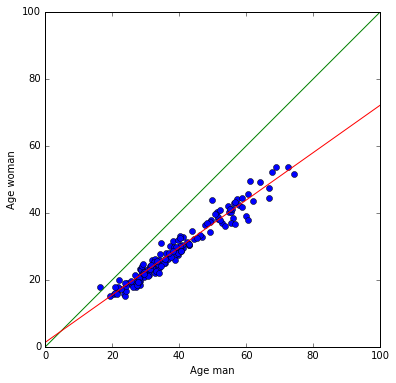

In [8]:
# Finally, using 'formation.hazard.agegap.gap_agescale_man' and
# 'formation.hazard.agegap.gap_agescale_woman', the preferred age difference
# becomes age dependent, and the slope of the resulting distribution will
# clearly be different than the one of the green line.

cfg = {}
cfg["population.simtime"] = 50
cfg["population.nummen"] = 200
cfg["population.numwomen"] = 200
cfg["formation.hazard.type"] = "agegap"
cfg["formation.hazard.agegap.baseline"] = 0
cfg["formation.hazard.agegap.gap_factor_man"] = -0.3
cfg["formation.hazard.agegap.gap_agescale_man"] = 0.3
cfg["formation.hazard.agegap.gap_factor_woman"] = -0.3
cfg["formation.hazard.agegap.gap_agescale_woman"] = 0.3
showAges(cfg);